# Caffeine & Cognition Simulation

This notebook simulates how caffeine affects cognitive performance over time, incorporating both short-term boosts and long-term tolerance effects.

### Features modeled:
- Caffeine dose (0–600 mg)
- Habitual vs. new user profiles
- Baseline alertness
- Sleep quality
- Inverted U-shaped dose-response
- Long-term tolerance with repeated use

We train an AI model (MLPRegressor) to predict `cognitive_score` and evaluate performance. This is a synthetic dataset based on insights from:
- Lorist et al. (2003)
- Nehlig (2010)
- Koppelstaetter et al. (2010)

Ready to extend to Matcha, L-theanine, or AI stack personalization in future versions.


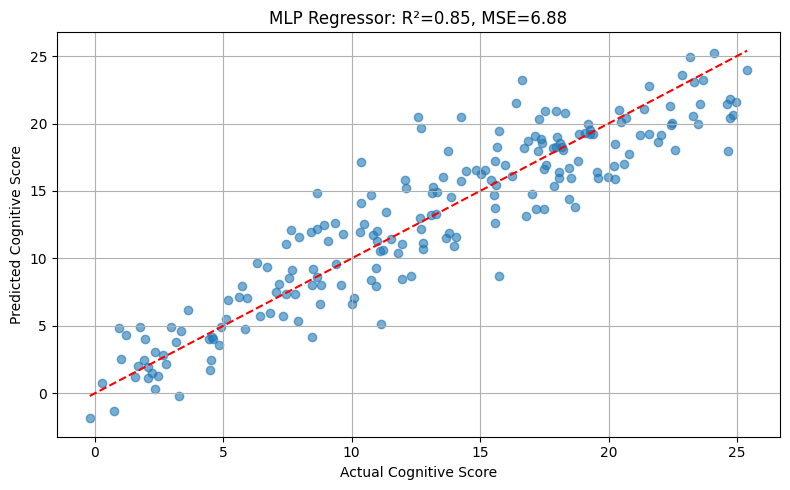

✅ Saved as 'synthetic_caffeine_cognition_dataset.csv'


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate literature-informed synthetic dataset
np.random.seed(42)
n_samples = 1000

# Features
days = np.random.randint(1, 101, n_samples)
dose_mg = np.random.choice([0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 800, 1000], n_samples)
habitual_user = np.random.choice([0, 1], n_samples)
baseline_arousal = np.round(np.random.uniform(0.3, 0.9, n_samples), 2)
sleep_hours = np.round(np.random.normal(7, 1.2, n_samples), 1)
sleep_hours = np.clip(sleep_hours, 3, 10)

# Dose-response curve from literature
def dose_response(dose):
    if dose < 50:
        return 0.2 * dose  # mild benefits
    elif dose <= 200:
        return 10 + 0.05 * (dose - 50)  # peak at ~17.5
    elif dose <= 400:
        return 17.5 - 0.03 * (dose - 200)  # decline from overstimulation
    else:
        return 11.5 - 0.02 * (dose - 400)  # further decline

dose_effect = np.array([dose_response(d) for d in dose_mg])

# Tolerance: for habitual users only
tolerance = 1 - 0.005 * days * habitual_user
tolerance = np.clip(tolerance, 0.5, 1)

# Sleep impact: <6h = penalty, >8h = slight bonus
sleep_bonus = np.where(sleep_hours < 6, -4, np.where(sleep_hours > 8, 1.5, 0))

# Final cognitive score
cognitive_score = (
    dose_effect +
    baseline_arousal * 10 +
    sleep_bonus +
    np.random.normal(0, 1.2, n_samples)
) * tolerance

# Extra metrics
reaction_time_ms = 600 - cognitive_score * 2.5 + np.random.normal(0, 15, n_samples)
working_memory_score = np.clip(cognitive_score + np.random.normal(0, 4, n_samples), 0, 100)

# Final DataFrame
df = pd.DataFrame({
    'day': days,
    'dose_mg': dose_mg,
    'habitual_user': habitual_user,
    'baseline_arousal': baseline_arousal,
    'sleep_hours': sleep_hours,
    'reaction_time_ms': reaction_time_ms,
    'working_memory_score': working_memory_score,
    'cognitive_score': cognitive_score
})

# Step 2: Train-test split
X = df[['day', 'dose_mg', 'habitual_user', 'baseline_arousal', 'sleep_hours']]
y = df['cognitive_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
model = MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Plot predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Cognitive Score")
plt.ylabel("Predicted Cognitive Score")
plt.title(f"MLP Regressor: R²={r2:.2f}, MSE={mse:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save dataset
df.to_csv("synthetic_caffeine_cognition_dataset.csv", index=False)
print("✅ Saved as 'synthetic_caffeine_cognition_dataset.csv'")


## Simulation 1: Daily Use vs. Caffeine Cycling

This simulation compares cognitive performance over 30 days:
- **User A** takes 250 mg caffeine daily (habitual use)
- **User B** uses the same dose but follows a 5-days-on, 2-days-off cycling strategy

We use the trained model to predict `cognitive_score` for each day.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

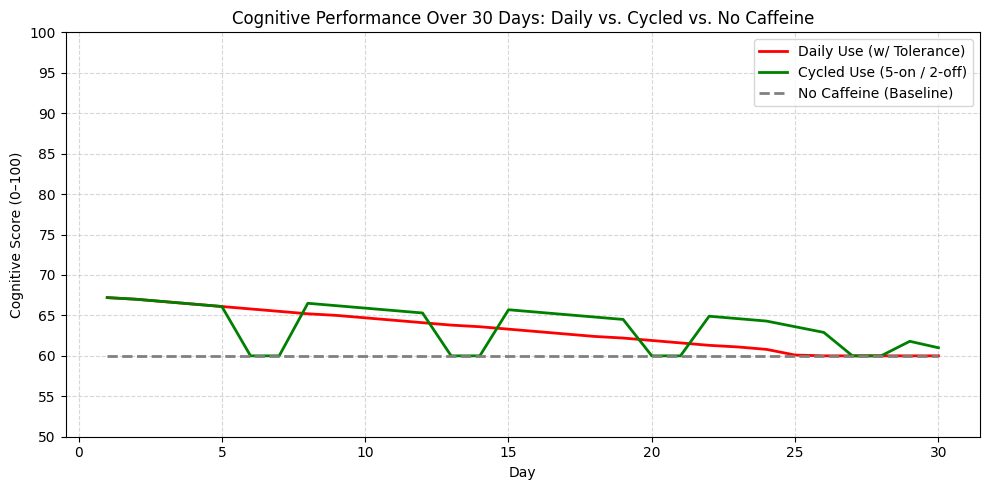

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Normalize model predictions to 0–100 scale
n_samples = 1000
np.random.seed(42)
sample_days = np.random.randint(1, 101, n_samples)
sample_doses = np.linspace(0, 600, n_samples)
sample_users = np.random.choice([0, 1], n_samples)
sample_arousal = np.random.uniform(0.1, 1.0, n_samples)
sample_sleep = np.clip(np.random.normal(7, 1.2, n_samples), 3, 10)

sample_df = pd.DataFrame({
    'day': sample_days,
    'dose_mg': sample_doses,
    'habitual_user': sample_users,
    'baseline_arousal': sample_arousal,
    'sleep_hours': sample_sleep
})

sample_df['predicted_score'] = model.predict(sample_df[['day', 'dose_mg', 'habitual_user', 'baseline_arousal', 'sleep_hours']])
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(sample_df[['predicted_score']])

# STEP 2: Simulate 30-day Daily vs Cycled vs Baseline use
days = np.arange(1, 31)
dose = 250
baseline_arousal = 0.7
sleep_hours = 7.0

daily_scores = []
cycled_scores = []
baseline_scores = []

caffeine_days_daily = 0
caffeine_days_cycled = 0

for day in days:
    # ---- Daily user ----
    caffeine_days_daily += 1
    tolerance_factor_daily = max(0.85, 1 - 0.003 * caffeine_days_daily)
    daily_input = pd.DataFrame([[day, dose, 1, baseline_arousal, sleep_hours]], columns=sample_df.columns[:5])
    base_score_daily = model.predict(daily_input)[0]
    scaled_score_daily = scaler.transform([[base_score_daily]])[0][0]
    adjusted_score_daily = round(scaled_score_daily * tolerance_factor_daily, 1)
    adjusted_score_daily = np.clip(adjusted_score_daily, 60, 100)
    daily_scores.append(adjusted_score_daily)

    # ---- Cycled user ----
    is_off_day = (day % 7 == 6 or day % 7 == 0)
    if is_off_day:
        caffeine_days_cycled = max(0, caffeine_days_cycled - 2)
        cycled_dose = 0
        cycled_user = 0
    else:
        caffeine_days_cycled += 1
        cycled_dose = dose
        cycled_user = 1

    tolerance_factor_cycled = max(0.85, 1 - 0.003 * caffeine_days_cycled)
    cycled_input = pd.DataFrame([[day, cycled_dose, cycled_user, baseline_arousal, sleep_hours]], columns=sample_df.columns[:5])
    base_score_cycled = model.predict(cycled_input)[0]
    scaled_score_cycled = scaler.transform([[base_score_cycled]])[0][0]
    adjusted_score_cycled = round(scaled_score_cycled * tolerance_factor_cycled, 1)
    adjusted_score_cycled = np.clip(adjusted_score_cycled, 60, 100)
    cycled_scores.append(adjusted_score_cycled)

    # ---- Baseline user (no caffeine) ----
    baseline_input = pd.DataFrame([[day, 0, 0, baseline_arousal, sleep_hours]], columns=sample_df.columns[:5])
    base_score_baseline = model.predict(baseline_input)[0]
    scaled_score_baseline = scaler.transform([[base_score_baseline]])[0][0]
    adjusted_score_baseline = round(scaled_score_baseline, 1)
    adjusted_score_baseline = np.clip(adjusted_score_baseline, 60, 100)
    baseline_scores.append(adjusted_score_baseline)

# STEP 3: Plot results
plt.figure(figsize=(10, 5))
plt.plot(days, daily_scores, label='Daily Use (w/ Tolerance)', color='red', linewidth=2)
plt.plot(days, cycled_scores, label='Cycled Use (5-on / 2-off)', color='green', linewidth=2)
plt.plot(days, baseline_scores, label='No Caffeine (Baseline)', color='gray', linestyle='--', linewidth=2)
plt.xlabel("Day")
plt.ylabel("Cognitive Score (0–100)")
plt.title("Cognitive Performance Over 30 Days: Daily vs. Cycled vs. No Caffeine")
plt.ylim(50, 100)
plt.yticks(np.arange(50, 101, 5))
plt.xticks(np.arange(0, 31, 5))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Simulation 2: Dose-Response Curve on Day 1

This simulation shows how different caffeine doses (0–600 mg) affect cognition on Day 1.

We simulate for a non-habitual user with baseline arousal of 0.7 and 7 hours of sleep.


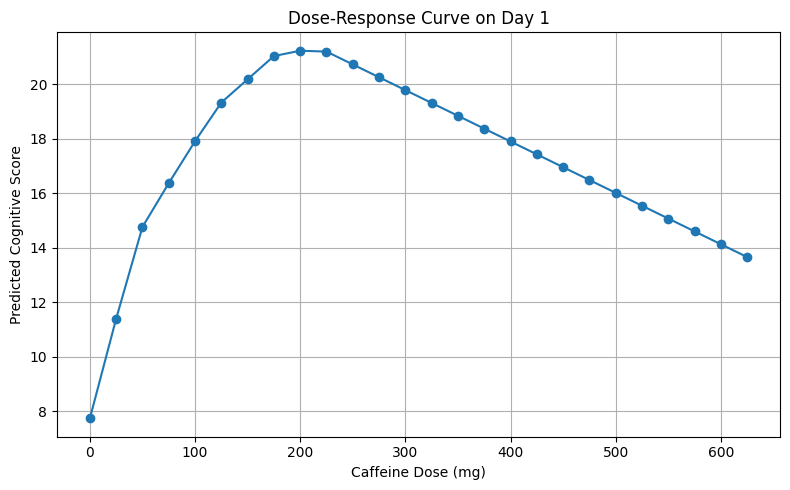

In [ ]:
doses = np.arange(0, 650, 25)
scores = []

for dose in doses:
    input_data = pd.DataFrame([[1, dose, 0, 0.7, 7]],
                              columns=X.columns)
    score = model.predict(input_data)[0]
    scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(doses, scores, marker='o')
plt.xlabel("Caffeine Dose (mg)")
plt.ylabel("Predicted Cognitive Score")
plt.title("Dose-Response Curve on Day 1")
plt.grid(True)
plt.tight_layout()
plt.show()
